In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset
from prep_dataset import *

In [26]:
ds_name = "ENZYMES"
dataset, info = prep_dataset(ds_name)
n_features = info[0]
n_classes = info[1]

In [27]:
# Getting Train Logs
GCN_1 = np.loadtxt("./logs/train_log_GCN_ENZYMES_0.0005_100_20_0.01_split.txt", delimiter=",").reshape(10, -1, 3)
GCNA_1 = np.loadtxt("./logs/train_log_GCNA_ENZYMES_0.0005_100_20_0.01_split.txt", delimiter=",").reshape(10, -1, 3)
GIN_1 = np.loadtxt("./logs/train_log_GIN_ENZYMES_0.0005_100_20_0.01_5_2_split.txt", delimiter=",").reshape(10, -1, 3)
GINA_1 = np.loadtxt("./logs/train_log_GINA_ENZYMES_0.0005_100_20_0.01_5_2_split.txt", delimiter=",").reshape(10, -1, 3)
config_1_logs = [GCN_1, GCNA_1, GIN_1, GINA_1]

GCN_2 = np.loadtxt("./logs/train_log_GCN_ENZYMES_0.001_300_20_0.1_split.txt", delimiter=",").reshape(10, -1, 3)
GCNA_2 = np.loadtxt("./logs/train_log_GCNA_ENZYMES_0.001_300_20_0.1_split.txt", delimiter=",").reshape(10, -1, 3)
GIN_2 = np.loadtxt("./logs/train_log_GIN_ENZYMES_0.001_300_20_0.1_5_2_split.txt", delimiter=",").reshape(10, -1, 3)
GINA_2 = np.loadtxt("./logs/train_log_GINA_ENZYMES_0.001_300_20_0.1_5_2_split.txt", delimiter=",").reshape(10, -1, 3)
config_2_logs = [GCN_2, GCNA_2, GIN_2, GINA_2]
print(GCNA_2.shape)
print(GCNA_1.shape)

model_names = ['GCN', 'GCNA', 'GIN', 'GINA']


(10, 300, 3)
(10, 100, 3)


In [28]:
def plot_learning_curves(train_log):
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))
    #fig.tight_layout()
    ax[0].grid()
    ax[1].grid()

    ax[0].plot(train_log[:, 0], train_log[:, 1])
    ax[0].set(xlabel="epochs", ylabel="loss")

    ax[1].set_ylim(bottom=0, top=100)
    ax[1].plot(train_log[:, 0], train_log[:, 2])
    ax[1].set(xlabel="epochs", ylabel="train_acc")
    #ax[1].legend()

    return fig, ax

def plot_training_acc(logs, n_folds, model_names):
    for i in range(n_folds):
        fig = plt.figure(figsize=(15,5))
        fig.suptitle("Training Acc split no. {}".format(i+1))
        ax = plt.axes()
        ax.grid()
        ax.set(xlabel="epochs", ylabel="train_acc")
        ax.set_ylim(bottom=0, top=100)
        for log in logs:
            ax.plot(log[i, :, 0], log[i, :, 2])
            ax.legend(model_names)

## Class distribution of the dataset (ENZYMES):

Percentage of class 1: 16.67%
Percentage of class 2: 16.67%
Percentage of class 3: 16.67%
Percentage of class 4: 16.67%
Percentage of class 5: 16.67%
Percentage of class 6: 16.67%


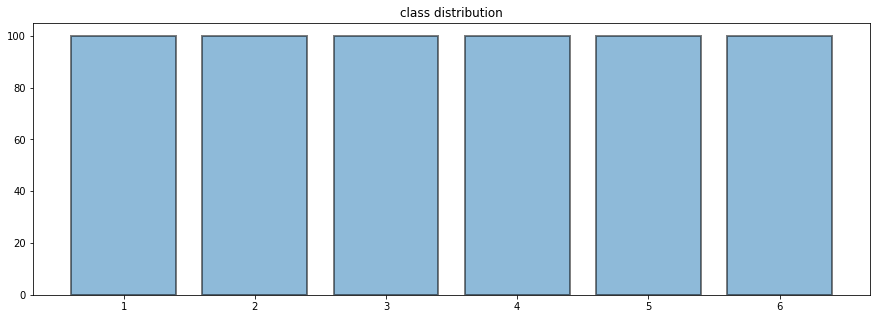

In [29]:
h_labels = dataset[:][2]
unique, counts = np.unique(h_labels.cpu(), return_counts=True)
###
for i, cl in enumerate(unique):
    print("Percentage of class {}: {:.2f}%".format(cl, 100*counts[i]/sum(counts)))
####
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
ax.bar(unique, counts, align='center', alpha=0.5, edgecolor='black', linewidth=2)
ax.set_title("class distribution")
ax.set_xticks(unique)
plt.show()

## Resluts:

### First set of hyperparameters:

- learning rate = 0.0005
- number of epochs = 100
- hidden layers' dimension = 20
- dropout rate = 0.01
- number of gnn layers (GIN) = 5
- number of mlp layers (GIN) = 2

| Model | Avg. Accuracy | Max Accuracy |
|:-----:|:-------------:|:------------:|
|  GCN  |     20.9%     |     31.0%    |
|  GCNA |     22.7%     |     35.0%    |
|  GIN  |     27.4%     |     35.0%    |
|  GINA |     30.0%     |     40.0%    |


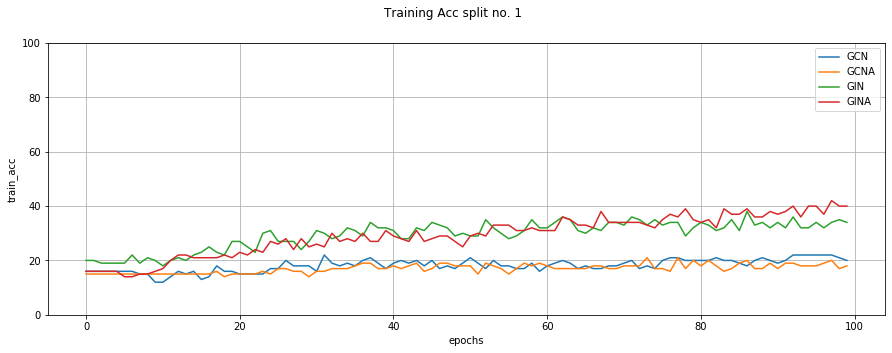

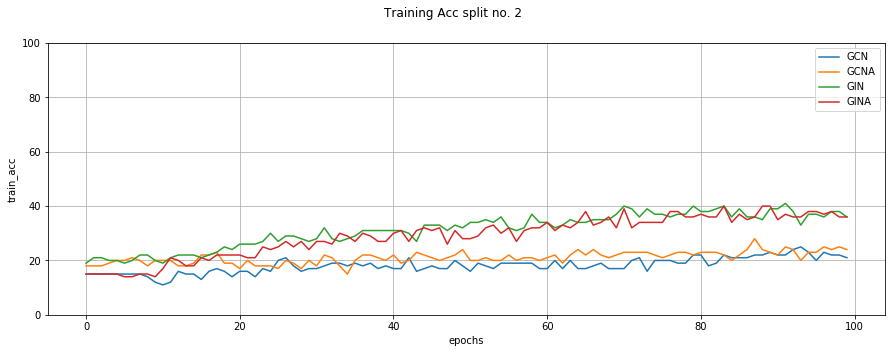

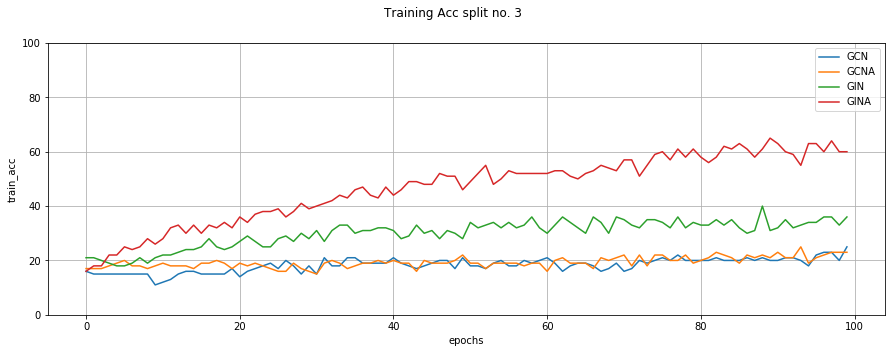

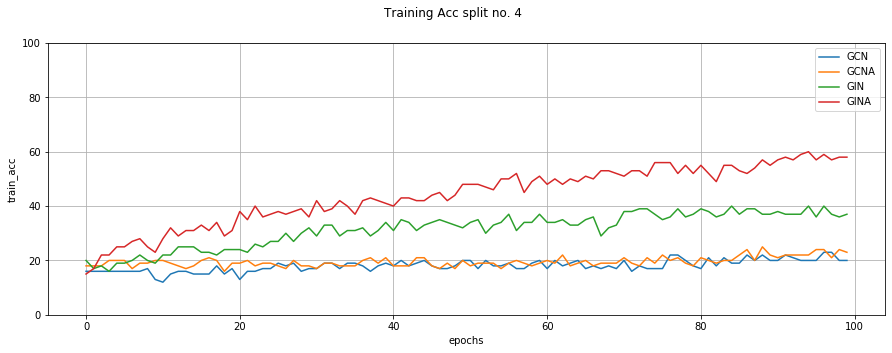

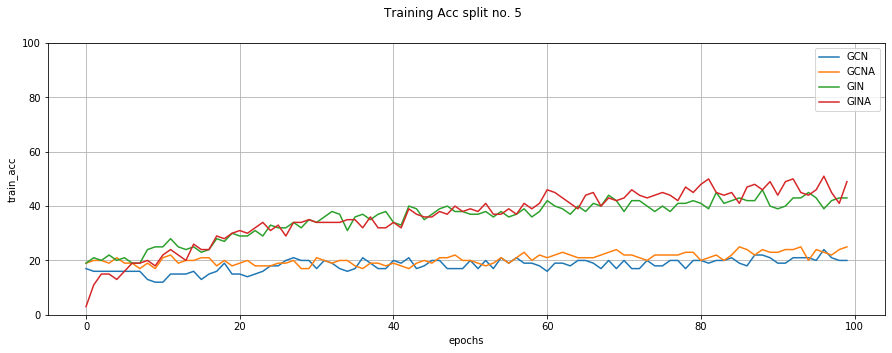

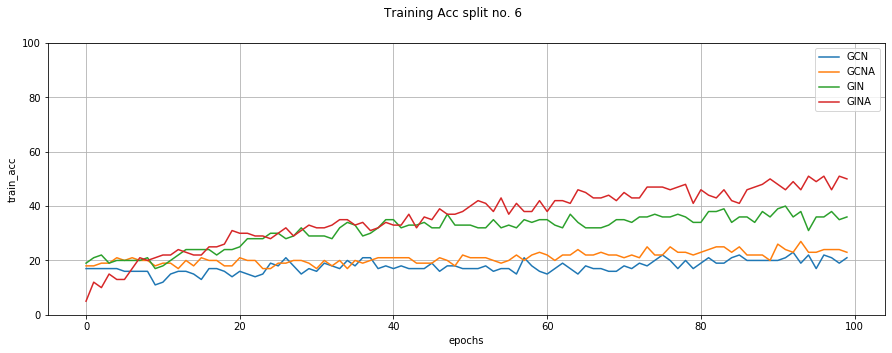

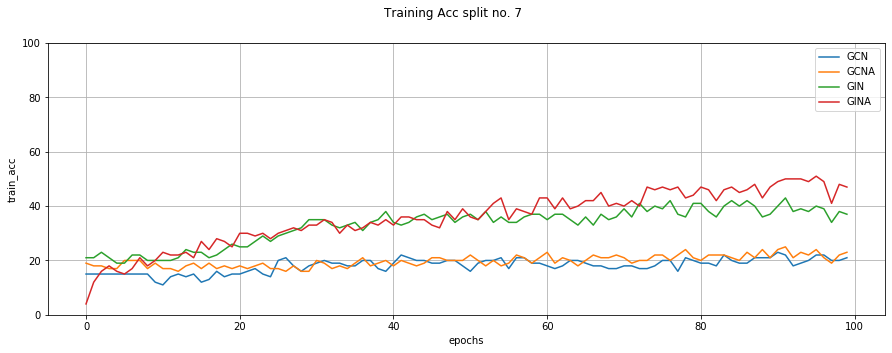

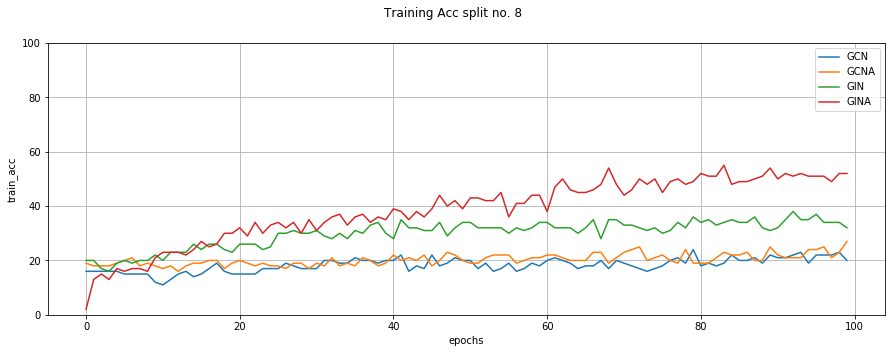

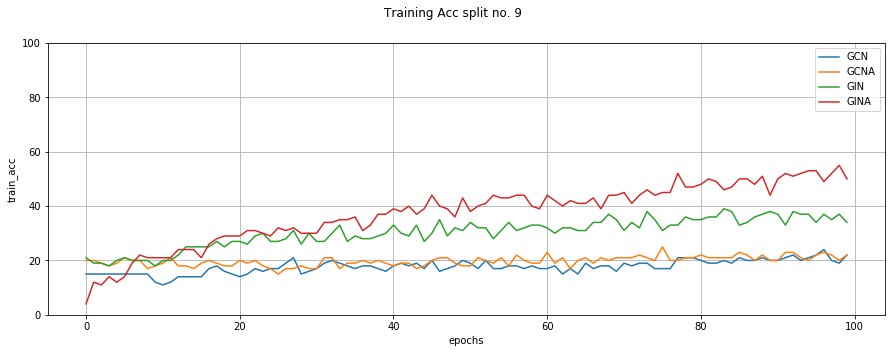

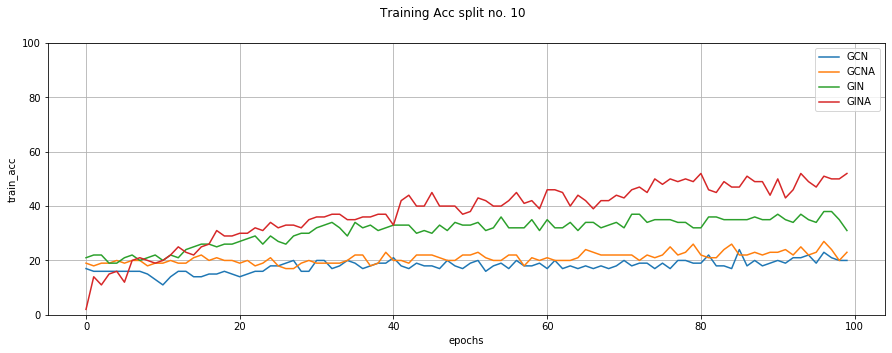

In [30]:
plot_training_acc(config_1_logs, 10, model_names)

### Second set of hyperparameters:

- learning rate = 0.001
- number of epochs = 300
- hidden layers' dimension = 20
- dropout rate = 0.1
- number of gnn layers (GIN) = 5
- number of mlp layers (GIN) = 2

| Model | Avg. Accuracy | Max Accuracy |
|:-----:|:-------------:|:------------:|
|  GCN  |     18.1%     |     30.0%    |
|  GCNA |     27.0%     |     35.0%    |
|  GIN  |     31.1%     |     41.0%    |
|  GINA |     44.6%     |     55.0%    |

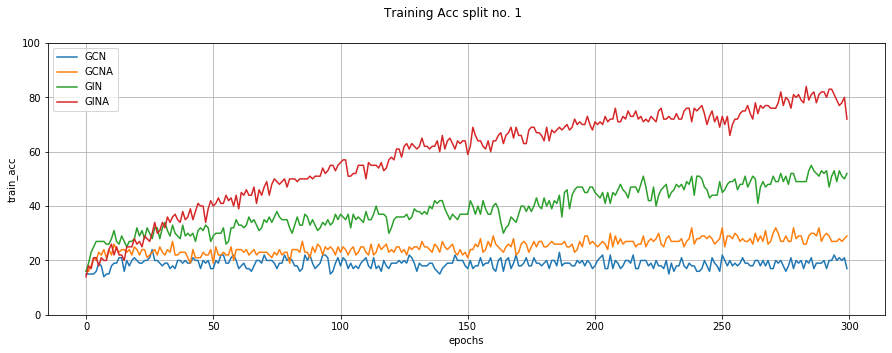

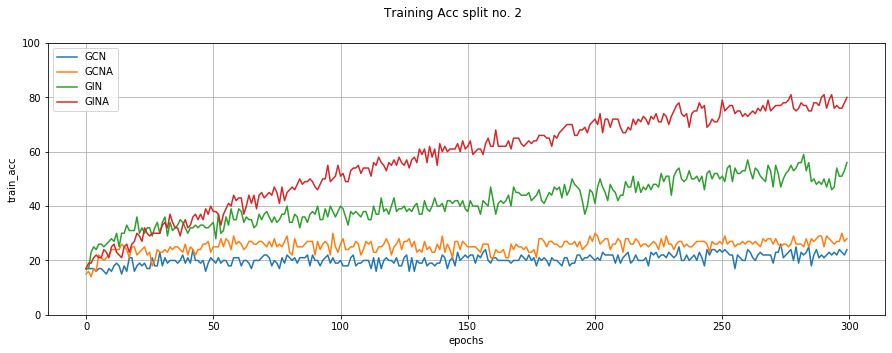

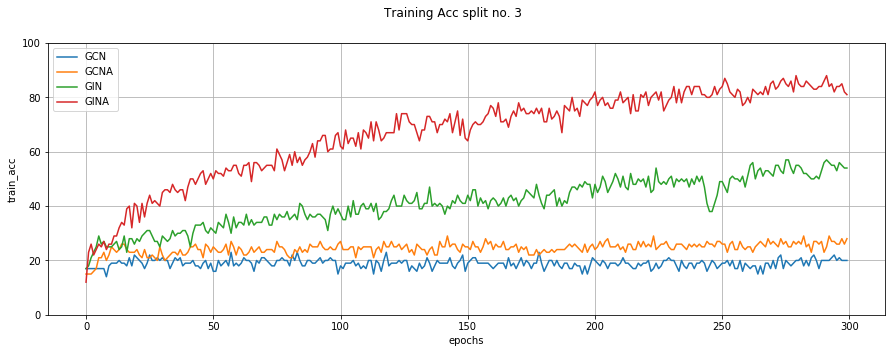

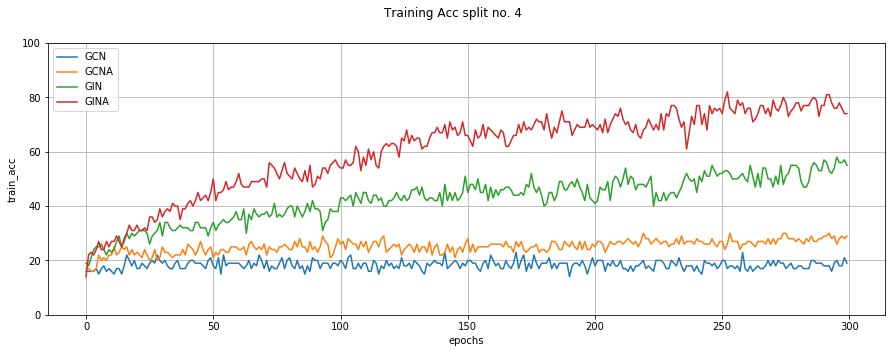

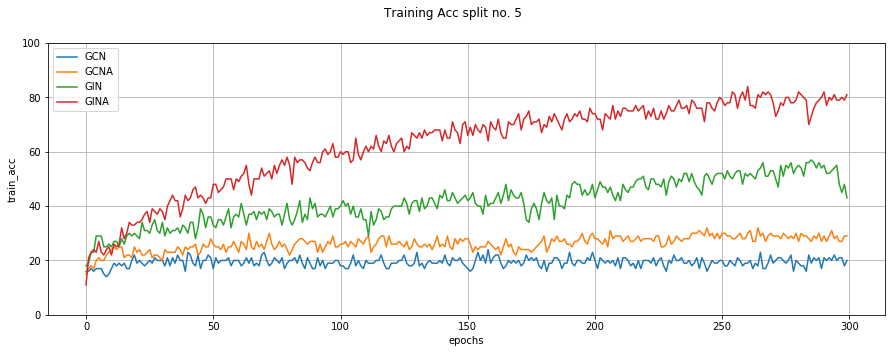

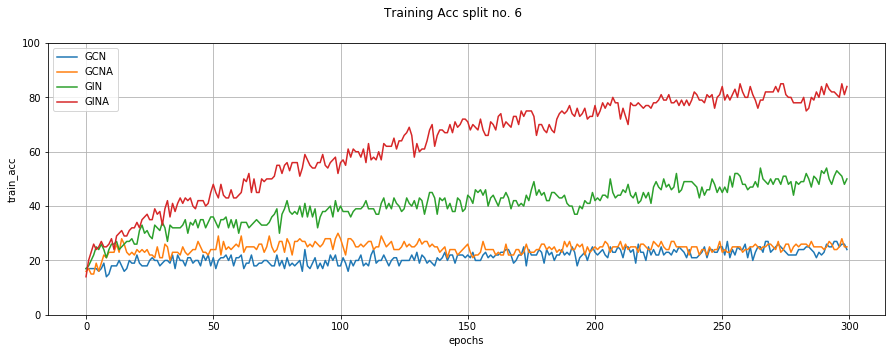

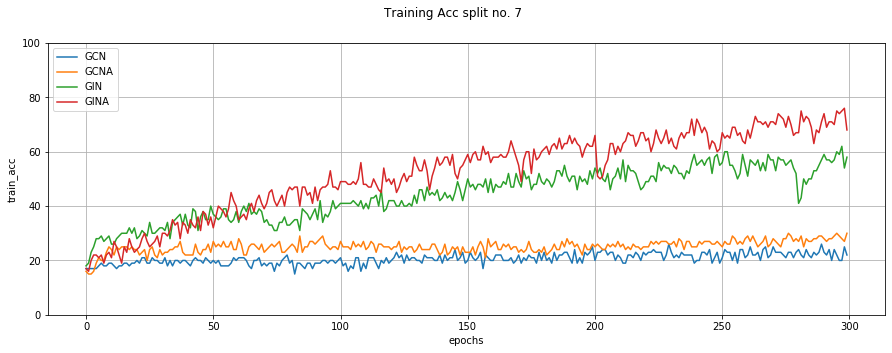

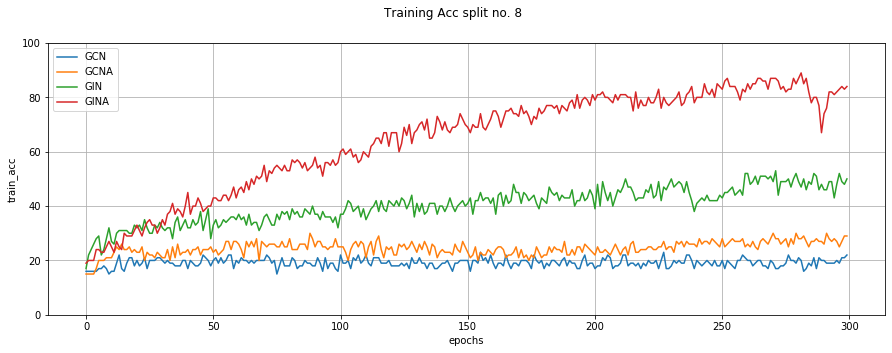

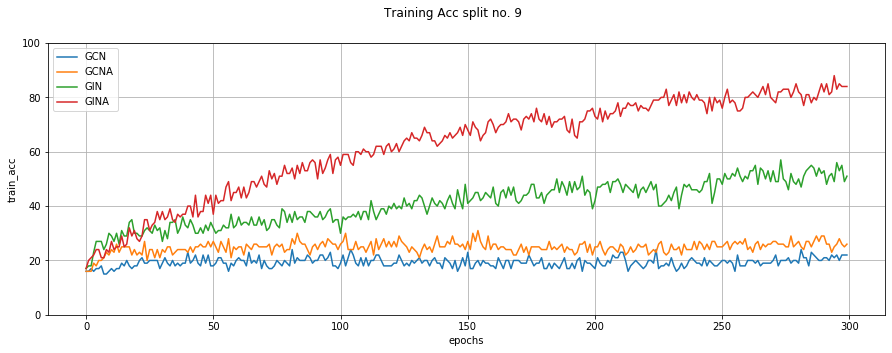

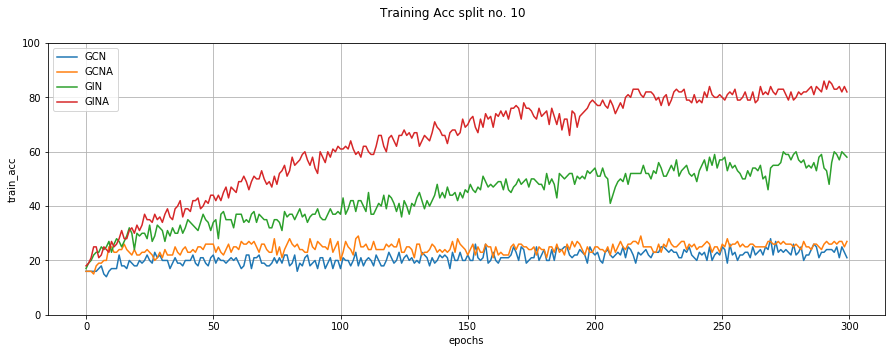

In [31]:
plot_training_acc(config_2_logs, 10, model_names)